/tmp/ipykernel_36880/2422853191.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  rate , Data = wav.read('sample.wav')


44100 (262094, 2)
5.9431746031746036 2.2675736961451248e-05


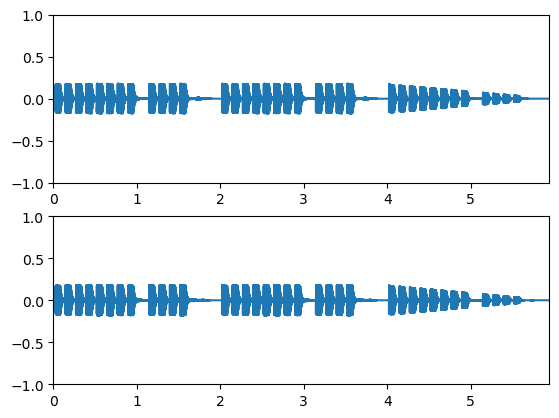

In [4]:
import scipy.io.wavfile as wav
import numpy as np
import matplotlib.pyplot as plt
rate , Data = wav.read('sample.wav')
print(rate , Data.shape)
n = len(Data)
t = n / rate
dt = 1 / rate
print(t, dt)
x = np.arange(0, n*dt, dt)
y = Data / 32768
if len(Data.shape) == 1:
    plt.plot(x, y)
    plt.xlim(0, t), plt.ylim(-1, 1)
elif len(Data.shape) == 2:
    fig , ax = plt.subplots (2)
for i in range(2):
    ax[i].plot(x, y[:, i])
    ax[i].set_xlim(0, t), ax[i].set_ylim(-1, 1)
plt.show()

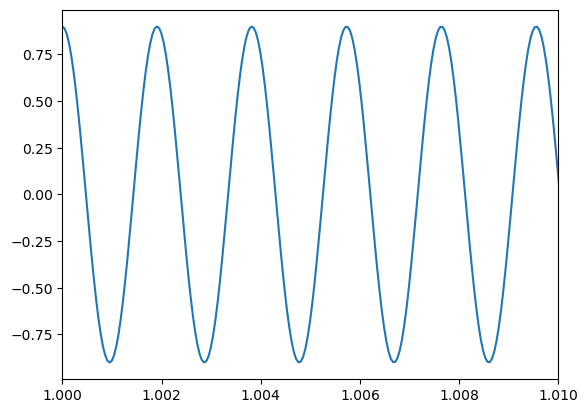

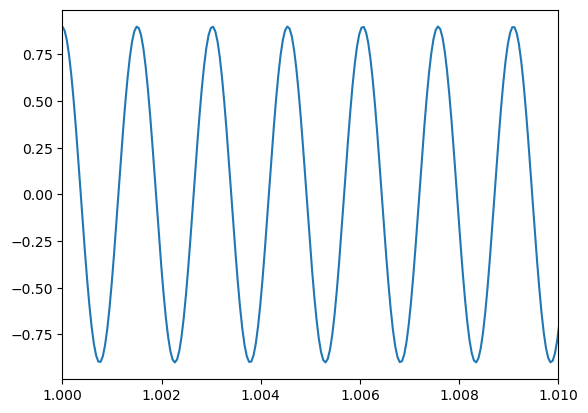

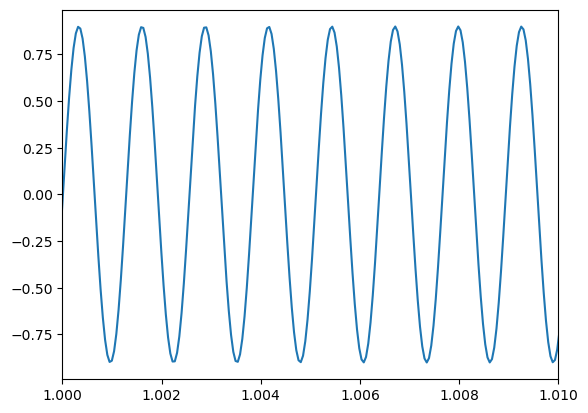

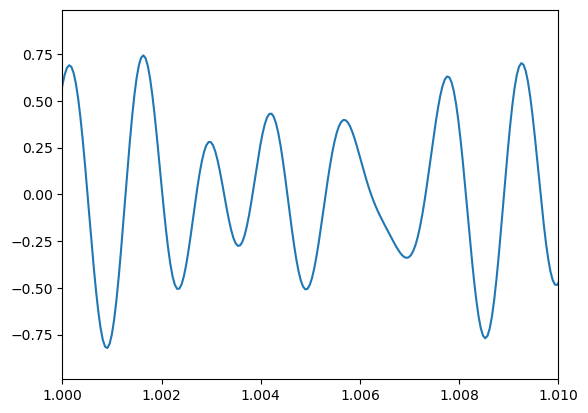

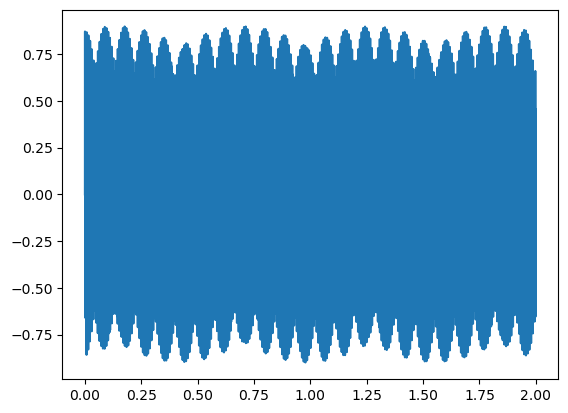

In [6]:
from numpy import arange , pi, sin
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
xmax , rate = 2, 22050
x = arange(0, xmax , 1 / rate)
def f(hz):
    octave = [2 ** n for n in [0, 1, 2, -2, -1]]
    return [sin(2 * pi * hz * n * x) * 0.9 for n in octave]
A = f(440.000000) # la
B = f(493.883301) # si
C = f(523.251131) # do
D = f(587.329536) # re
E = f(659.255114) # mi
F = f(698.456463) # fa
G = f(783.990872) # sol
CEG = (C[0] + E[0] + G[0]) / 3
Data = (CEG * 32768).astype('int16')
wav.write('CEG.wav', rate , Data)
for y in [C[0], E[0], G[0], CEG]:
    plt.plot(x, y)
    plt.xlim(1, 1.01), plt.show()
plt.plot(x, CEG)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Funciones para matrices de transformación
def rotacion_z(theta):
    """Matriz de rotación en el eje Z."""
    return np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])

def rotacion_x(theta):
    """Matriz de rotación en el eje X."""
    return np.array([
        [1, 0, 0],
        [0, np.cos(theta), -np.sin(theta)],
        [0, np.sin(theta), np.cos(theta)]
    ])

def rotacion_y(theta):
    """Matriz de rotación en el eje Y."""
    return np.array([
        [np.cos(theta), 0, np.sin(theta)],
        [0, 1, 0],
        [-np.sin(theta), 0, np.cos(theta)]
    ])

def escalado(sx, sy, sz):
    """Matriz de escalado."""
    return np.diag([sx, sy, sz])

def traslacion(tx, ty, tz):
    """Vector de traslación."""
    return np.array([tx, ty, tz])

# Vértices de un cubo
def crear_cubo():
    """Genera los vértices de un cubo de tamaño 1 centrado en el origen."""
    puntos = np.array([
        [-0.5, -0.5, -0.5],
        [0.5, -0.5, -0.5],
        [0.5, 0.5, -0.5],
        [-0.5, 0.5, -0.5],
        [-0.5, -0.5, 0.5],
        [0.5, -0.5, 0.5],
        [0.5, 0.5, 0.5],
        [-0.5, 0.5, 0.5]
    ])
    return puntos

# Aplicar transformaciones a los puntos del cubo
def aplicar_transformacion(cubo, matriz_transformacion, vector_traslacion=np.array([0, 0, 0])):
    """Aplica la matriz de transformación y traslación a los puntos del cubo."""
    cubo_transformado = np.dot(cubo, matriz_transformacion.T)  # Rotar/escalar
    cubo_transformado += vector_traslacion  # Trasladar
    return cubo_transformado

# Graficar el cubo en 3D
def graficar_cubo(ax, cubo, color='b'):
    """Grafica el cubo en 3D."""
    # Definir las conexiones entre los vértices del cubo
    conexiones = [
        [0, 1], [1, 2], [2, 3], [3, 0],  # Base inferior
        [4, 5], [5, 6], [6, 7], [7, 4],  # Base superior
        [0, 4], [1, 5], [2, 6], [3, 7]   # Conexiones verticales
    ]
    for con in conexiones:
        ax.plot3D(*zip(*cubo[con]), color)

# Función principal de visualización interactiva
def main():
    # Crear el cubo
    cubo = crear_cubo()

    # Definir transformaciones
    angulo_rotacion = np.radians(30)  # Rotación de 30 grados
    escala = escalado(1.5, 1.5, 1.5)  # Escalado en los tres ejes
    traslacion_vector = traslacion(1, 1, 0)  # Traslación en el espacio

    # Aplicar transformaciones
    cubo_rotado = aplicar_transformacion(cubo, rotacion_z(angulo_rotacion))
    cubo_escalado = aplicar_transformacion(cubo_rotado, escala)
    cubo_transformado = aplicar_transformacion(cubo_escalado, np.eye(3), traslacion_vector)

    # Configurar el gráfico
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Graficar cubo original (en gris) y transformado (en azul)
    graficar_cubo(ax, cubo, color='gray')
    graficar_cubo(ax, cubo_transformado, color='blue')

    # Configuraciones de visualización
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Transformaciones 3D: Rotación, Escalado y Traslación')
    plt.show()



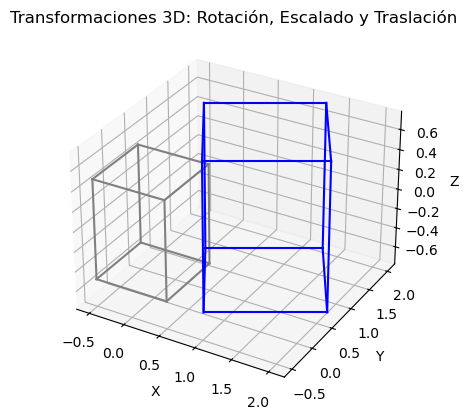

In [3]:
main()

Objetivos

- Eres un maemático avanzado  y tu expecialidad es la enseñanza del algebra lineal y usar lenguaje de paython para crrear retos y ejercicios simulaciones y aplicacines modernas 

- Ti ro es crear ejercicios no triviales que para resolverslos tengan que usar la libreria de algebra lineal de python. Además estos se deben  enfocar  en la resolución de problemas de la vida real y en el uso de los conceptos del algebra lineal

Base del conocimiento

Fuentes primarias 

- Debo utilizar los librosd e pdf como la base principal para interarctuar con los estudiantes y crear ejercicios y retos de la vida real

Metodos matematicos 

- Debo usar herramientas matemáticas para crear ejercicios y retos de la vida real, estas alicaciones debeen incluir datos cribles y reales

Alcances y limitaciones

Supoiciones del modelo

- Indicare clarametne las usposiones de los moderos propuestos y los limites de los mismos

- Debo usar herramientas matemáticas para crear ejercicios y retos de la vida real, estas alicaciones debeen incluir datos cribles y reales

Elemntos iteractivos 

- Debo usar progrmamas generados por python para cada unos de los retos y ejercicios propuestos

- Los ejercicios propuestos tendran visulizaciones en python sencillas de implementar

 - La programación usada para geerar los retos datos y demas deben ser sencillas de usar y faciles de entender
